In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data =  pd.read_json("./data.json")


#data[data["capture"] == "tw"][["angle","a2a1","a3a2","a3a1"]].to_json("./lemure.json")

# Per distance

In [3]:
cap="tw"
ds = data[data["capture"] ==cap] 
ds.sample(2)

,index,mac,timestamp,no,rssi,raw,frequency,iq,angle,distance,capture,ref,a1,a2,a3,a2a1,a3a2,a3a1
6005,51,c300000a7a63,2024-10-04 16:36:36.275000+00:00,0,-59,0201061bff3906cafb0114f6ffe4ff0001000000000000...,2480,"[-196, 22, 21, -189, 180, 63, -107, 160, -140,...",-60,200.0,tw,"[3.0298156121, -1.4601391056000002, 0.33667481...","[-1.6653411983000002, 2.8225594838, 0.96962083...","[0.0708272727, -1.7506498266000001, 2.78604907...","[1.7791118894, -0.0914112019, -1.8138294671000...","[1.7361684711, 1.7099759968, 1.816428247300000...","[1.7082846165999999, 1.6592386247, 1.683306760...","[-2.8387322194999998, -2.9139706857, -2.783450..."
1251,98,c300000a7a48,2024-10-04 17:13:47.230000+00:00,0,-49,0201061bff3906cafb01140000ffec0102000000000000...,2426,"[158, 27, -58, 143, -133, -56, 90, -125, 88, 1...",15,200.0,tw,"[0.1692512185, 1.9561161445000002, -2.74307020...","[-2.9553698132, 1.1294380195, -0.9568815977, -...","[1.4313562697, -0.8663022626, 3.1415926536, 1....","[0.3947911197, -1.6934649823, 2.4448503721, 0....","[-1.8964592243, -1.995740282, -2.1847110559, -...","[-1.03656515, -0.8271627197, -0.69674228150000...","[-2.9330243743, -2.8229030018, -2.8814533374, ..."


C:\Users\pedro\AppData\Local\Temp\ipykernel_15180\3548212196.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for sample in ds[ds["angle"] ==  angle][ds["distance"] == distance].iterrows():


Text(0.5, 0.98, "Diferenças de fase na captura 'tw' a -90\n Distancias: [100.0, 150.0, 200.0]")

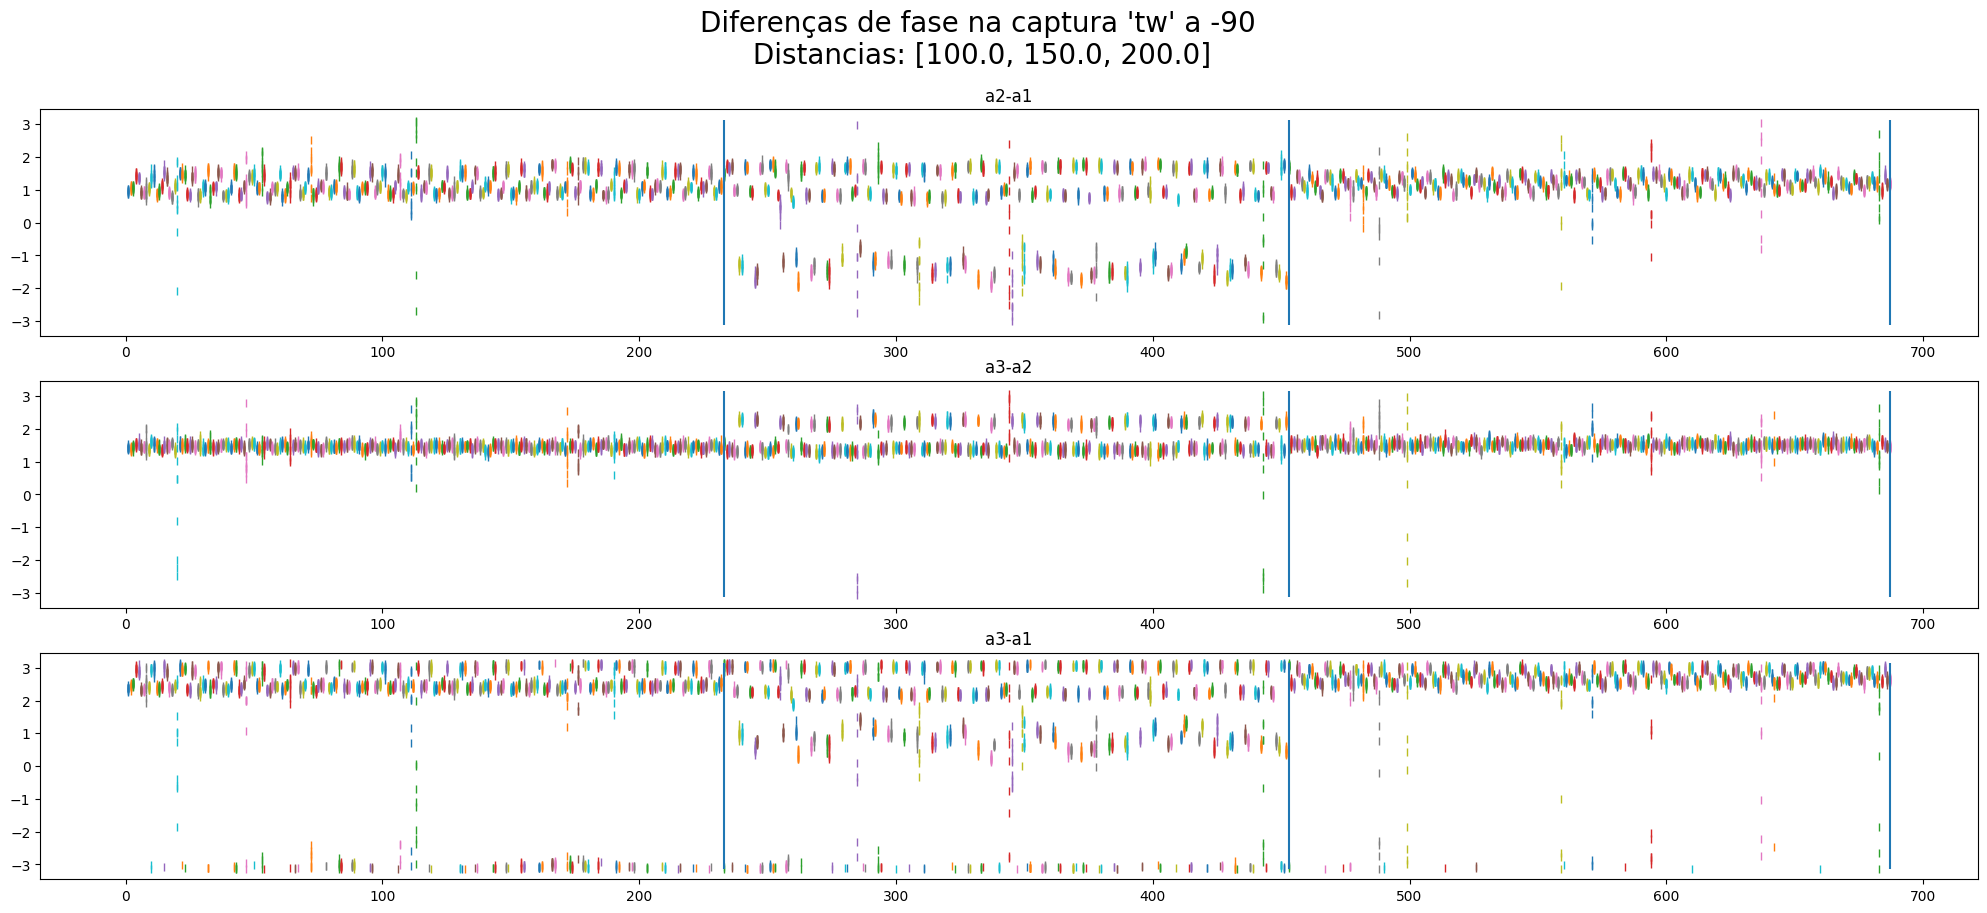

In [6]:
angles = list(set(ds["angle"]))
angles.sort()
angle=-90#angles[2]

distances= list(set(ds[ds["angle"] ==  angle]["distance"]))
distances.sort()

#fig, ax =plt.subplots(3,len(distances),figsize=(40,10))
fig, ax =plt.subplots(3,1,figsize=(25,10))

ax[0].set_title("a2-a1")
ax[1].set_title("a3-a2")
ax[2].set_title("a3-a1")

index=0
for row, distance in enumerate(distances):
    for sample in ds[ds["angle"] ==  angle][ds["distance"] == distance].iterrows():
        index+=1
        #ax[0].plot([index]*len(sample[1]["a2a1"]),sample[1]["a2a1"],"k") 
        ax[0].plot([index]*len(sample[1]["a2a1"]),sample[1]["a2a1"],"|") 
        ax[1].plot([index]*len(sample[1]["a3a2"]),sample[1]["a3a2"],"|") 
        ax[2].plot([index]*len(sample[1]["a3a1"]),sample[1]["a3a1"],"|")

    ax[0].vlines(index,-np.pi,np.pi,label=distance)
    ax[1].vlines(index,-np.pi,np.pi,label=distance)
    ax[2].vlines(index,-np.pi,np.pi,label=distance)

fig.suptitle(f"Diferenças de fase na captura '{cap}' a {angle}\n Distancias: {distances}",size=20)


# Same distance diff angles

C:\Users\pedro\AppData\Local\Temp\ipykernel_2740\1733065896.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for sample in ds[ds["angle"] ==  angle][ds["distance"] == distance].iterrows():


Text(0.5, 0.98, "Diferenças de media fase na captura 'tw' a 100.0\n Angles: [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180]")

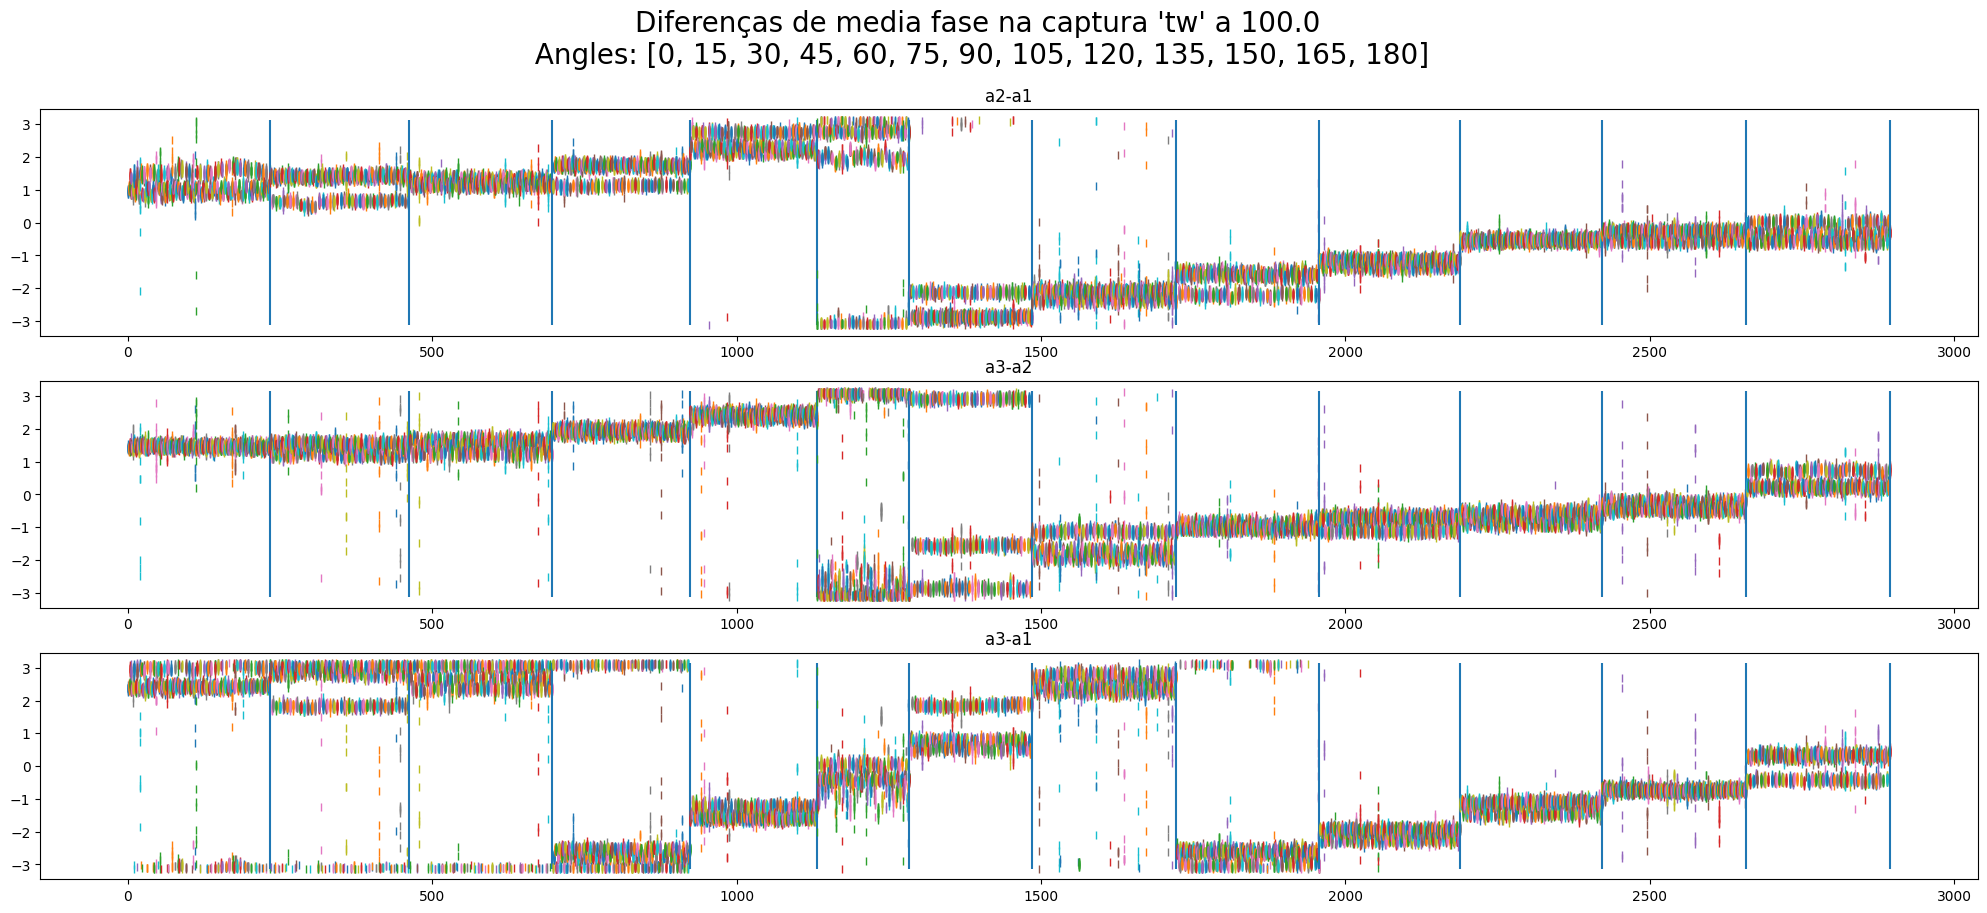

In [11]:
cap="tw"
ds = data[data["capture"] ==cap] 

angles = list(set(ds["angle"]))
angles.sort()
#angle=90#angles[2]

distances= list(set(ds[ds["angle"] ==  angle]["distance"]))
distances.sort()
distance=distances[0]

#fig, ax =plt.subplots(3,len(distances),figsize=(40,10))
fig, ax =plt.subplots(3,1,figsize=(25,10))

ax[0].set_title("a2-a1")
ax[1].set_title("a3-a2")
ax[2].set_title("a3-a1")

index=0
for row, angle in enumerate(angles):
    for sample in ds[ds["angle"] ==  angle][ds["distance"] == distance].iterrows():
        #ax[0].plot([index]*len(sample[1]["a2a1"]),sample[1]["a2a1"],"k") 
        index+=1
        ax[0].plot([index]*len(sample[1]["a2a1"]),sample[1]["a2a1"],"|") 
        ax[1].plot([index]*len(sample[1]["a3a2"]),sample[1]["a3a2"],"|") 
        ax[2].plot([index]*len(sample[1]["a3a1"]),sample[1]["a3a1"],"|")

    ax[0].vlines(index,-np.pi,np.pi)
    ax[1].vlines(index,-np.pi,np.pi)
    ax[2].vlines(index,-np.pi,np.pi)

fig.suptitle(f"Diferenças de media fase na captura '{cap}' a {distance}\n Angles: {angles}",size=20)


C:\Users\pedro\AppData\Local\Temp\ipykernel_15180\694737142.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ds = data[data["capture"] ==cap][data["distance"].isin((100,200) ) ]


Text(0.5, 0.98, "Diferenças de media fase na captura 'tw' \n Angles: [-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90]")

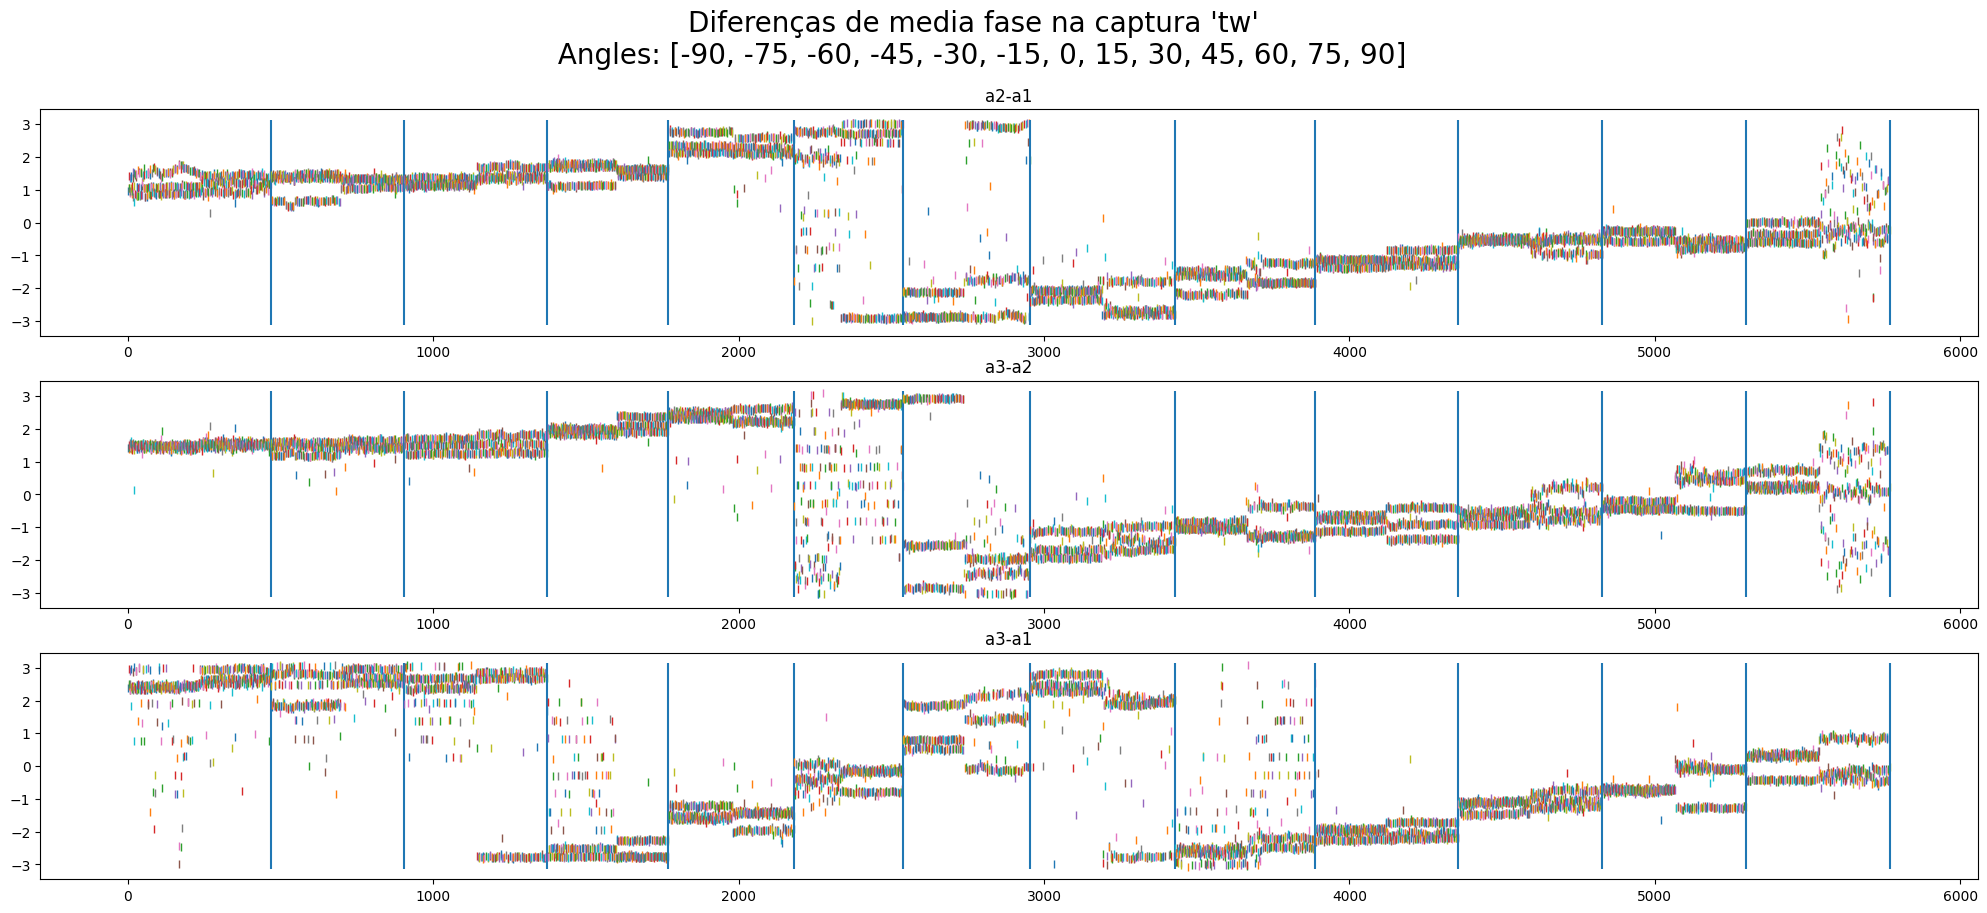

In [13]:
cap="tw"
ds = data[data["capture"] ==cap][data["distance"].isin((100,200) ) ] 

angles = list(set(ds["angle"]))
angles.sort()
#angle=90#angles[2]

# distances= list(set(ds[ds["angle"] ==  angle]["distance"]))
# distances.sort()
# distance=distances[0]

#fig, ax =plt.subplots(3,len(distances),figsize=(40,10))
fig, ax =plt.subplots(3,1,figsize=(25,10))

ax[0].set_title("a2-a1")
ax[1].set_title("a3-a2")
ax[2].set_title("a3-a1")

index=0
for row, angle in enumerate(angles):
    for sample in ds[ds["angle"] ==  angle].iterrows():
        index+=1
        #ax[0].plot([index]*len(sample[1]["a2a1"]),sample[1]["a2a1"],"k") 
        ax[0].plot(index,np.mean(sample[1]["a2a1"]),"|") 
        ax[1].plot(index,np.mean(sample[1]["a3a2"]),"|") 
        ax[2].plot(index,np.mean(sample[1]["a3a1"]),"|")

    ax[0].vlines(index,-np.pi,np.pi)
    ax[1].vlines(index,-np.pi,np.pi)
    ax[2].vlines(index,-np.pi,np.pi)

fig.suptitle(f"Diferenças de media fase na captura '{cap}' \n Angles: {angles}",size=20)


C:\Users\pedro\AppData\Local\Temp\ipykernel_15180\694737142.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ds = data[data["capture"] ==cap][data["distance"].isin((100,200) ) ]


Text(0.5, 0.98, "Diferenças de media fase na captura 'tw' \n Angles: [-90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90]")

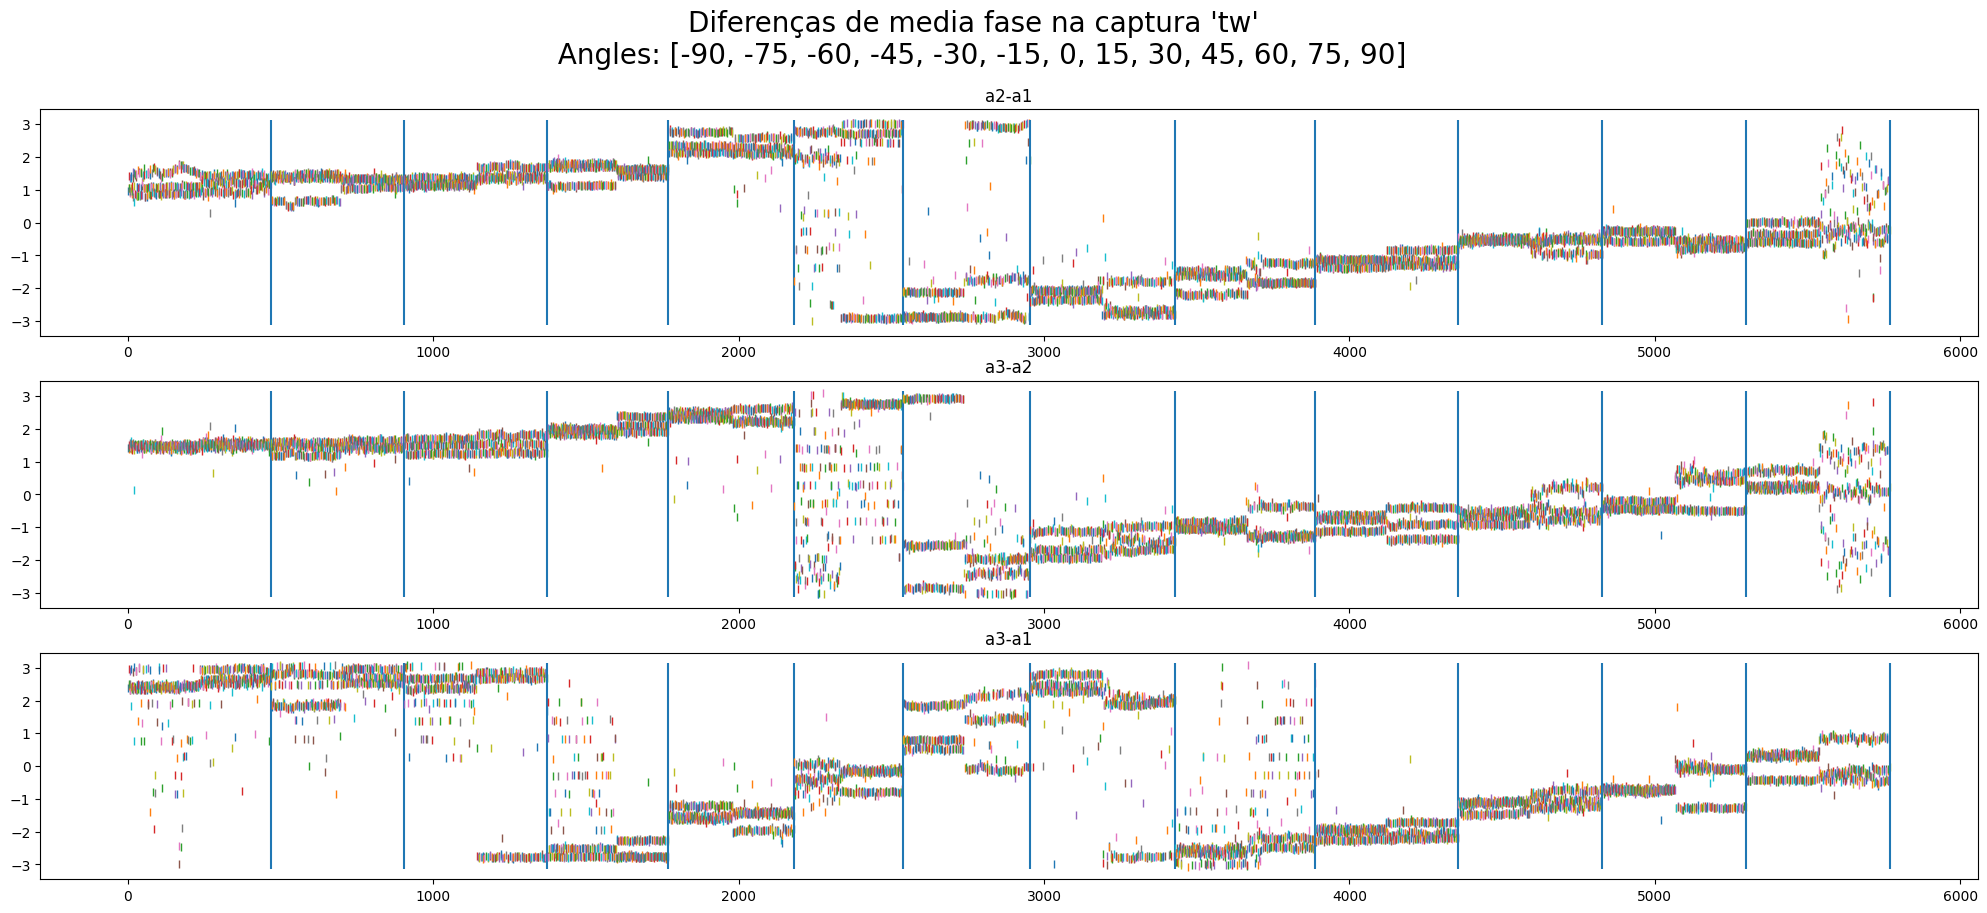

In [14]:
cap="tw"
ds = data[data["capture"] ==cap][data["distance"].isin((100,200) ) ] 

angles = list(set(ds["angle"]))
angles.sort()
#angle=90#angles[2]

# distances= list(set(ds[ds["angle"] ==  angle]["distance"]))
# distances.sort()
# distance=distances[0]

#fig, ax =plt.subplots(3,len(distances),figsize=(40,10))
fig, ax =plt.subplots(3,1,figsize=(25,10))

ax[0].set_title("a2-a1")
ax[1].set_title("a3-a2")
ax[2].set_title("a3-a1")

index=0
for row, angle in enumerate(angles):
    for sample in ds[ds["angle"] ==  angle].iterrows():
        index+=1
        #ax[0].plot([index]*len(sample[1]["a2a1"]),sample[1]["a2a1"],"k") 
        ax[0].plot(index,np.mean(sample[1]["a2a1"]),"|") 
        ax[1].plot(index,np.mean(sample[1]["a3a2"]),"|") 
        ax[2].plot(index,np.mean(sample[1]["a3a1"]),"|")

    ax[0].vlines(index,-np.pi,np.pi)
    ax[1].vlines(index,-np.pi,np.pi)
    ax[2].vlines(index,-np.pi,np.pi)

fig.suptitle(f"Diferenças de media fase na captura '{cap}' \n Angles: {angles}",size=20)
